In [1]:
import staircase as sc
from imports import *
%matplotlib inline


C:\Anaconda3\lib\site-packages\cupy\_environment.py:265: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Anaconda3\\lib\\site-packages\\cupy\\.data\\_wheel.json' mode='r' encoding='cp1252'>
  _preload_config = json.load(open(config_path))


In [2]:
df = pd.read_csv(r"../data/page_views.csv")

vsteps = Steps.read_dataframe(df,'start','ends')

df.shape

(947, 3)

0

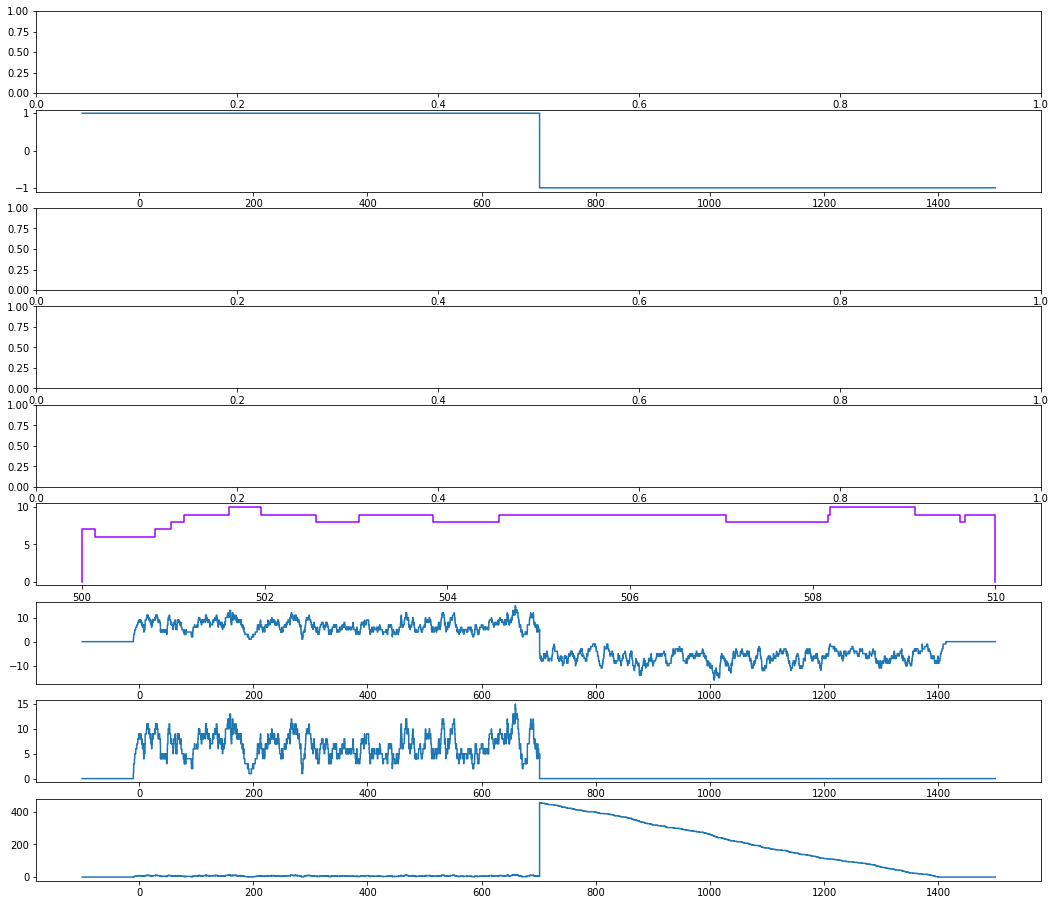

In [7]:
#p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,12,30), pd.Timedelta(hours=1)).astype(pd.Timestamp)
fig,ax = plt.subplots(nrows=9,figsize=(18,16))

st,se,span = vsteps.span()

#error here, this isn't the same as Step() - Step(start=st+0.5*span,weight=2)
haar0 = Step(end=st+0.5*span,weight=(1,-1))
haar00 = Step(end=st+0.5*span,weight=1) - Step(start=st+0.5*span,weight=1)

haar = Step() - Step(start=st+0.5*span,weight=2)

#print(haar0,'| - |',haar)
#vsteps.rebase(tbase)
vs_clip = vsteps.clip(500,510)

#vsteps.plot(ax=ax[0])
#vsteps.smooth_plot(ax=ax[0],color='g',ts_grain=0.1,smooth_factor=15)

#queue = sc.Stairs().layer(df.start, df.ends)
#queue.plot(ax[1])

#vsteps.histogram_plot(ax=ax[3],kind='bar')
#xx = vsteps.pacf_plot(10,ax=ax[4],kind='bar')
#xx.axhline(0,c='black',linestyle=':')
#vsteps.ecdf_plot(ax=ax[5])

vs_clip.plot(ax=ax[5])
t = np.arange(-100,1500,0.1)
t2 = np.arange(490,520,0.1)
#(vsteps*haar).plot(ax=ax[5])
ax[1].step(t,haar(t))
#ax[5].step(t2,vs_clip(t2))
#ax[2].step(t,haar0(t))
ax[6].step(t,(vsteps*haar)(t))
ax[7].step(t,(vsteps*haar0)(t))
ax[8].step(t,(haar00*vsteps)(t))

#vs_clip.smooth_plot(ax=ax[5],color='g',ts_grain=0.01,smooth_factor=1)

# print(queue.clip(500,510).integrate())

# print(vsteps.clip(500,510).integrate())
# print((vsteps*haar).integrate())
# print(st,se,span)
#vsteps(-5)
#(vsteps*haar)(-5)
vs_clip.min()

In [ ]:
print(haar00,'| - |',haar)
print(type(haar00),'| - |',type(haar))

In [ ]:
fig,ax = plt.subplots(nrows=2)

t = np.arange(-100,1500,0.1)

h = Step()
h2 = Step(600)
h3 = Step(end=800)
ax[0].step(t,(h-h2)(t))
ax[0].step(t,h3(t))

ss = Step(650,750)
ax[1].step(t,ss(t),linestyle=':')
ax[1].step(t,(haar0*ss)(t))
ax[1].step(t,haar0(t))
# print(h)
# print(h2)
# print(h3)

In [ ]:
d_min = pd.Timestamp.min
d_min.Timestamp